In [7]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

# Project Euler problem 657 - Incomplete words

[Link to problem on Project Euler homepage](https://projecteuler.net/problem=657)

## Description

In the context of **formal languages**, any finite sequence of letters of a given **alphabet** $\Sigma$ is called a **word** over $\Sigma$. We call a word *incomplete* if it does not contain every letter of $\Sigma$.

For example, using the alphabet $\Sigma = \left\{a,b,c\right\}$, 'ab', 'abab' and '' (the empty word) are incomplete words over $\Sigma$, while 'abac' is a complete word over $\Sigma$.

Given an alphabet $\Sigma$ of $\alpha$ letters, we define $I(\alpha,n)$ to be the number of incomplete words over $\Sigma$ with a length not exceeding $n$.

For example, $I(3,0)=1$, $I(3,2)=13$ and $I(3,4)=79$.

Find $I(10^7,10^{12})$. Give your answer modulo $1000000007$.

## Other definitions

In addition to the function $I$, I will also define another function, $J(\alpha, n)$, which is the number of incomplete words over $\Sigma$ with a length equal to $n$. Under this definition $I(\alpha, n) = \sum_{k=0}^n J(\alpha, k)$. This function will be useful in the exploration of the problem.

## Brute force algorithm
It is easy to set up a brute force algorithm that can solve smaller versions of the problem simply by iterating over all possible words and testing if the word is incomplete.

In [2]:
from itertools import product

def J_brute_force(alpha, n):
    n_incomplete = 0 # number of incomplete words
    for permutations in product(range(alpha), repeat=n):
        if len(set(permutations)) < alpha:
            n_incomplete += 1 # only do addition if word is incomplete
    return n_incomplete

def I_brute_force(alpha, n):
    n_incomplete = 0 # number of incomplete words
    for k in range(0, n+1):
        n_incomplete += J_brute_force(alpha, k)
    return n_incomplete

In [3]:
print("Brute force test")
print("I(3, 0) = {}".format(I_brute_force(3,0)))
print("I(3, 2) = {}".format(I_brute_force(3,2)))
print("I(3, 4) = {}".format(I_brute_force(3,4)))

Brute force test
I(3, 0) = 1
I(3, 2) = 13
I(3, 4) = 79


Using the brute force algorithm, we can investigate how $I(\alpha, n)$ evolves for different combinations of $\alpha$ and $n$. The figure below shows how $I$ grows as a function of $n$ for constant $\alpha$.

The dotted lines show the function $\sum_{k=0}^n \alpha^k$. On the graph it can be seen that $I$ is the same as the dotted lines at values of $n$ less than $\alpha$. This, of course, is because the total number of words of length $n$ is equal to $\alpha^n$ and the total number of words with a length not exceeding $n$ is equal to $\sum_{k=0}^n \alpha^k$. Words shorter than the size of the alphabet are necessarily incomplete, why $I$ and the dotted lines begin to deviate at $n \geq \alpha$ 

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


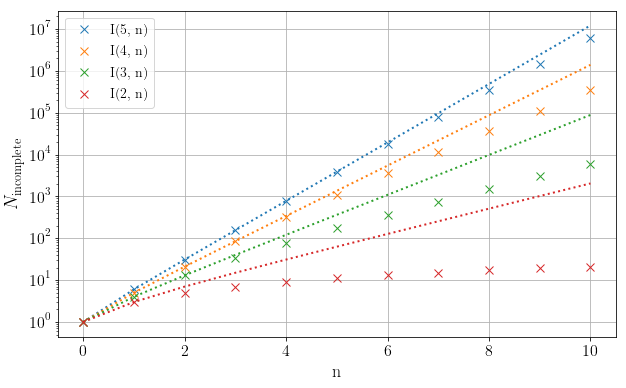

In [8]:
for alpha, color in zip(range(5, 1, -1), ['C0', 'C1', 'C2', 'C3']):
    I = np.cumsum([J_brute_force(alpha, k) for k in range(11)])
    N_word = np.cumsum([alpha**k for k in range(11)])
    plt.plot(I, 'x', label="I({}, n)".format(alpha), color=color);
    plt.plot(N_word, ':', color=color);
plt.xlabel('n');
plt.ylabel('$N_\mathrm{incomplete}$');
plt.yscale('log');
plt.legend();

## Optimisation

For $n > 10$ the brute force algorithm quickly becomes prohibitively slow, and we therefore have to investigate the problem further.

In essence, the problem is one of combinatorics. To ensure that an incomplete word of length $n$ is generated, we can require that one letter is missing such that the total number of ways to form a word is equal to $(\alpha - 1)^n$. There are $\binom{\alpha}{1}$ ways to remove one letter from an alphabet of size $\alpha$ giving an expression for the total number of words lacking at least one letter as

$$\binom{\alpha}{1} \times (\alpha - 1)^n.$$

However, some words will be generated multiple times by this procedure. For example, for $\alpha = 4$ and $n = 4$ words that lack one letter (e.g. `aabc` or `dccb`) will be generated once. Words that lack two letters (`aabb` or `baab`) will be generated twice - one time when `d` is held out and another when `c` is held out. Similarly, words that lack three letters (`aaaa` or `cccc`) will be generated three times.

To correct this double counting one has to subtract the number of ways to generate a word lacking at least two letters

$$\binom{\alpha}{2} \times (\alpha - 2)^n.$$

Doing this will generate all words that lack two letters exactly once and all words that lack three letters three times. We therefore have to add the total number of ways to generate a word lacking at least three letters back in

$$\binom{\alpha}{3} \times (\alpha - 3)^n.$$

Continuing this procedure, known as the [Inclusion–exclusion principle](https://en.wikipedia.org/wiki/Inclusion–exclusion_principle), gives $J(\alpha, n)$

$$
\begin{eqnarray}
J(\alpha, n) &=& \binom{\alpha}{1} \times (\alpha - 1)^n - \binom{\alpha}{2} \times (\alpha - 2)^n + \ldots \\ 
&=& \sum_{i=1}^\alpha (-1)^{i+1} \times \binom{\alpha}{i} \times (\alpha - i)^n.
\end{eqnarray}
$$

Below is shown an implementation of this expression. It uses the recurrence 

$$\binom{n}{k+1} = \frac{n-k}{k+1} \binom{n}{k}$$

to calculate the binomial coefficient with initial value $\binom{n}{1} = n$.

In [5]:
def J(alpha, n):
    alphaCn = alpha # initialize to alpha choose 1
    n_incomplete = 0
    for i in range(1, alpha+1):
        n_incomplete += (-1)**(i+1) * alphaCn * (alpha - i)**n
        
        # update binomial coefficient recursively
        alphaCn *= alpha - i
        alphaCn //= i + 1
        
    return n_incomplete

In [6]:
print("J_brute_force(5, 10) = {}".format(J_brute_force(5, 10)))
%timeit J_brute_force(5, 10)
print("J(5, 10) = {}".format(J(5, 10)))
%timeit J(5, 10)

J_brute_force(5, 10) = 4662625
3.48 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
J(5, 10) = 4662625
3.91 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


To calculate $I(\alpha, n)$ we note that

$$
\begin{eqnarray}
I(\alpha, n) &=& \sum_{k=0}^n J(\alpha, k) \\
 &=& \sum_{k=0}^n \sum_{i=1}^\alpha (-1)^{i+1} \times \binom{\alpha}{i} \times (\alpha - i)^k \\
 &=& \sum_{i=1}^\alpha (-1)^{i+1} \times \binom{\alpha}{i} \times \sum_{k=0}^n (\alpha - i)^k \\
 &=& \sum_{i=1}^\alpha (-1)^{i+1} \times \binom{\alpha}{i} \times \frac{1 - (\alpha - i)^{n+1}}{1 - (\alpha - i)},
\end{eqnarray}
$$

where, in the last step, we have used the identity of a [finite Geometric series](https://en.wikipedia.org/wiki/Geometric_series)

$$
\sum_{k=0}^n r^k = \frac{1 - r^{n+1}}{1 - r}.
$$

This expression is valid for all values of $i$ except for $i = \alpha - 1$ where it is equal to $n + 1$.

In [7]:
def I(alpha, n, mod=10**9+7):
    alphaCn = alpha % mod # initialize to alpha choose 1
    n_incomplete = 0
    for i in range(1, alpha+1):
        if i == (alpha - 1):
            power_sum = (n + 1) % mod
        else:
            power_sum = ((1 - pow(alpha-i, n+1, mod)) * pow((1 - alpha + i), mod-2, mod)) % mod

        n_incomplete += (pow(-1, i+1, mod) * alphaCn * power_sum) % mod
        n_incomplete %= mod

        # update binomial coefficient recursively
        alphaCn *= (alpha - i) * pow(i+1, mod-2, mod)
        alphaCn %= mod

    return n_incomplete

In [8]:
alpha, n = 10**7, 10**12
print("Result = {}".format(I(alpha, n)))
%timeit I(alpha, n)

Result = 219493139
2min 8s ± 1.45 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
